In [1]:
# Add relevant Jupyter notebook extensions 

In [3]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24:', 'F:\\Python\\python311.zip', 'F:\\Python\\DLLs', 'F:\\Python\\Lib', 'F:\\Python', 'c:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24\\env', '', 'c:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24\\env\\Lib\\site-packages', 'c:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24\\env\\Lib\\site-packages\\win32', 'c:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24\\env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Lenovo\\Desktop\\oxford\\b1-coding-practical-mt24\\env\\Lib\\site-packages\\Pythonwin']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

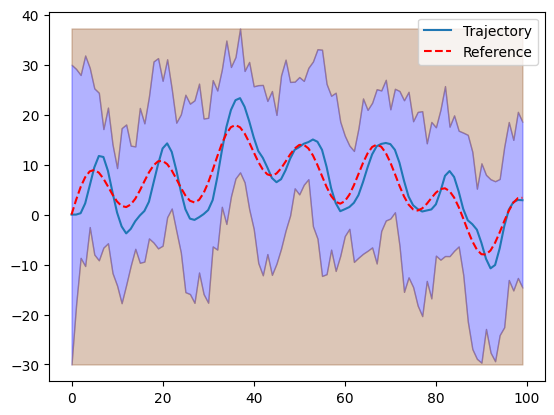

In [6]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import relevant modules
from uuv_mission import Submarine, ClosedLoop, Mission, Controller

sub = Submarine()
controller = Controller()

# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)

mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)